C:\Users\Kevin\AppData\Local\Temp\ipykernel_7580\1359046040.py:13: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (x - cx)**2) + cy


<Figure size 640x480 with 0 Axes>

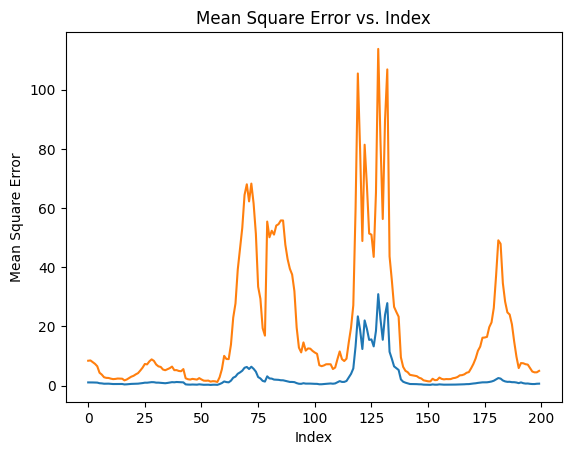

9.971
68.446
39.417
31.838
10.675
6.053
19.908
81.818
45.242
67.535
58.213


In [22]:
# 拟合并且保存图片
import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.patches import Circle
import os
# from scipy.optimize import curve_fit


def circle(x, cx, cy, r):
    return np.sqrt(r**2 - (x - cx)**2) + cy

# 创建一个列表，用于存储圆心和半径
circle_data = []
error_data = []
mean_square = []

# 读取黑白图片
input_folder = './p2-7_extracted_cropped_binary/p6_extracted/'
output_folder = './fitted_extracted/fitted_p6/'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
# os.path.join(output_path, 'fitted_'+filename)

i=1
plt.figure()
for filename in os.listdir(input_folder):
    # print(i)
    i=i+1

    # 创建一个新的 Figure 对象

    image = cv2.imread(os.path.join(input_folder, filename), cv2.IMREAD_GRAYSCALE)
    # image = cv2.imread('./cropped/cropped_p2-1_0015.bmp', cv2.IMREAD_GRAYSCALE)
    width, length = image.shape
    # print(width)
    
    cropped_image = image

    # 获取裁剪后图像的形状
    rows, cols = cropped_image.shape

    # 存储每列的第一个黑色点的坐标
    first_black_pixels = []

    # 遍历每一列
    for col in range(cols):
    # 找到当前列中第一个黑色点的行坐标
        black_pixel_row = np.argmax(cropped_image[:, col] == 0)
        
        # 如果找到了黑色点，则记录坐标
        if black_pixel_row > 0:  # 0 表示未找到黑色点
            # 转换坐标为完整图像坐标
            full_image_row =width - (0 + black_pixel_row)
            first_black_pixels.append((0 + col, full_image_row))

    # 将坐标转换为 NumPy 数组
    first_black_pixels = np.array(first_black_pixels)
    # print(first_black_pixels)

    # 进行圆形拟合
    # p0 = [np.mean(first_black_pixels[:, 0]), np.mean(first_black_pixels[:, 1]), 10.0]  # 初始猜测值
    p0 = [np.mean(first_black_pixels[:, 0]), np.mean(first_black_pixels[:, 1])-200, 200.0]  # 初始猜测值
    params, covariance = curve_fit(circle, first_black_pixels[:, 0], first_black_pixels[:, 1], p0=p0)

    # predicted_y = circle(first_black_pixels[:, 0], *params)

    # # 计算拟合误差
    # y_loss = np.sqrt(np.mean((first_black_pixels[:, 1] - predicted_y)**2))
    # print('y_loss:', y_loss)
    # r_squared = 1 - (np.sum((first_black_pixels[:, 1] - circle(first_black_pixels[:, 0], *params))**2) / np.sum((first_black_pixels[:, 1] - np.mean(first_black_pixels[:, 1]))**2))
    # print('r_squared:', r_squared)


    # error_data.append((round(y_loss, 3), round(r_squared, 3)))

    cx, cy, r = params
    fit_errors_pix = np.sqrt(np.diag(covariance))
    # print(f"Circle radius (r_scaled/pix): {r:.2f} ± {fit_errors_pix[2]:.2f}")



    mean_square.append((round(fit_errors_pix[0], 3), round(fit_errors_pix[1], 3), round(fit_errors_pix[2], 3)))
    # if fit_errors_pix[2] > 50:
    #     # print(i)

# 提取元组中的前两个值作为y轴的值
mean_square_values = [(item[0], item[1]) for item in mean_square[:200]]

plt.figure()
# plt.plot(range(len(mean_square[:200])), mean_square[:200])
plt.plot(range(len(mean_square[:200])), mean_square_values)
plt.xlabel('Index')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error vs. Index')
plt.show()

# print(mean_square[61][2])
# print(mean_square[73][2])
# print(mean_square[90][2])
# print(mean_square[92][2])
# print(mean_square[102][2])
# print(mean_square[110][2])
# print(mean_square[117][2])
# print(mean_square[121][2])
# print(mean_square[127][2])
# print(mean_square[128][2])
# print(mean_square[131][2])

print(mean_square[60][2])
print(mean_square[72][2])
print(mean_square[89][2])
print(mean_square[91][2])
print(mean_square[101][2])
print(mean_square[109][2])
print(mean_square[116][2])
print(mean_square[120][2])
print(mean_square[126][2])
print(mean_square[127][2])
print(mean_square[130][2])



#     fit_errors_pix = np.sqrt(np.diag(covariance))
#     # 提取拟合结果
#     cx, cy, r = params

#     # 生成拟合曲线的 x 值范围
#     fit_x = np.linspace(min(first_black_pixels[:, 0]), max(first_black_pixels[:, 0]), 100)
    
#     # 计算拟合曲线的 y 值
#     fit_y = circle(fit_x, cx, cy, r)

#     # 显示图像

#     plt.imshow(image, cmap='gray')

#     # 在坐标轴上画出每列的第一个黑色点的位置
#     plt.scatter(first_black_pixels[:, 0], width-first_black_pixels[:, 1], color='red', s=5)
#     # 画出拟合圆
#     # plt.plot(fit_x, fit_y, color='blue')
#     circle_patch = Circle((cx, width-cy), r, color='purple', fill=False)
#     plt.gca().add_patch(circle_patch)


#     scale_factor = 41 / length  # 将369像素映射到29mm

#     # 标记圆心位置
#     plt.scatter(cx, width-cy, color='green', marker='x')

#     p1= [1.2, 7.8]
#     p1_scaled=[0,0]
#     p1_scaled[0] = (p1[0]+13)/scale_factor
#     p1_scaled[1] = width - (p1[1]+6)/scale_factor 
#     print( "焊接位置/mm：", p1[0]+13, p1[1]+6) 

#     print(p1_scaled)
#     plt.scatter(p1_scaled[0], p1_scaled[1], color='red', marker='x')

#     # # 显示图像、黑色像素位置和拟合圆
#     # plt.axis('equal')
#     # plt.show()
#     output_filename = os.path.join(output_folder, 'fitted_'+filename.replace('bmp','jpg'))
#     plt.savefig(output_filename)
#     print("圆半径",r*scale_factor,"mm")


#     scaled_first_black_pixels = first_black_pixels * scale_factor
#     # p0_scaled = [175 * scale_factor, 60 * scale_factor, 150.0 * scale_factor]  # 初始猜测值
#     p0_scaled = [p * scale_factor for p in p0]
#     params_scaled, covariance_scaled = curve_fit(circle, scaled_first_black_pixels[:, 0], scaled_first_black_pixels[:, 1], p0=p0_scaled)
#     # 计算标准偏差作为拟合误差的估计
#     fit_errors_mm = np.sqrt(np.diag(covariance_scaled))
#     # print(f"Circle center (cx_scaled/mm, cy_scaled/mm): ({ cx*scale_factor -13:.2f} ± {fit_errors[0]:.2f}, {cy*scale_factor - 6:.2f} ± {fit_errors[1]:.2f})")
#     # print(f"Circle radius (r_scaled/mm): {r*scale_factor:.2f} ± {fit_errors[2]:.2f}")

#     print(f"Circle center (cx_scaled/pix, cy_scaled/pix): ({(cx -170):.2f} ± {fit_errors_pix[0]:.2f}, {(580 - cy):.2f} ± {fit_errors_pix[1]:.2f})")
#     print(f"Circle radius (r_scaled/pix): {r:.2f} ± {fit_errors_pix[2]:.2f}")
#     circle_data.append((round(cx - 0, 3), round(580 - cy , 3), round(r, 3)))
#     error_data.append((round(fit_errors_pix[0], 3), round(fit_errors_pix[1], 3), round(fit_errors_pix[2], 3)))


# # 读取文件
# # with open('predict.txt', 'r') as f:
# with open('./Data/labels-240301-p1_p6.txt', 'r') as f:
#     reader = csv.reader(f)
#     data = list(reader)

# # 找到第一个第四、五、六列为空的行的索引
# start_index = next((i for i, row in enumerate(data) if all(x == '' for x in row[3:6])), len(data))

# # 添加新的数据
# # for i in range(start_index, start_index + len(circle_data[:200])):
# #     if i < len(data):
# #         data[i][3:6] = circle_data[i - start_index]
# #     else:
# #         data.append(circle_data[i - start_index] + [''] * (len(data[0]) - 6))

# for i in range (800, 1000):
#     data[i][3:6] = circle_data[i - 800] 

# # 写回文件
# # with open('predict.txt', 'w', newline='') as f:
# with open('./Data/labels-240301-p1_p6.txt', 'w', newline='') as f:
#     writer = csv.writer(f)
#     writer.writerows(data)


# cv2.imwrite(output_filename, image)

In [2]:
with open('error.txt', 'r') as f:
    reader = csv.reader(f)
    error_txt = list(reader)
print(len(error_txt))

# for _ in range(1200 - len(error_txt)):
#     error_txt.append([''] * 3)
# print(len(error_txt))

# # 添加新的数据
for i in range(len(error_txt)):
    # 如果原有的列数不足6列，用空字符串填充
    while len(error_txt[i]) < 5:
        error_txt[i].append('')

for i in range (800, 1000):
    error_txt[i][0:2] = error_data[i - 800]
    # 写回文件
with open('error.txt', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(error_txt)

1200
